In [ ]:
## library
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# syntax import data
from google.colab import files
import io
uploaded = files.upload()

Saving exercise.csv to exercise.csv


In [ ]:
user_data = pd.read_csv(io.BytesIO(uploaded['exercise.csv']))

In [ ]:
user_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# take the 3 column for clustering

In [ ]:
columns_to_extract = ['Duration', 'Heart_Rate', 'Body_Temp']
new_df = user_data[columns_to_extract]

# Convert the DataFrame to a numpy array
x_cluster = new_df.to_numpy()
x_cluster

array([[ 29. , 105. ,  40.8],
       [ 14. ,  94. ,  40.3],
       [  5. ,  88. ,  38.7],
       ...,
       [ 16. ,  90. ,  40.1],
       [  2. ,  84. ,  38.3],
       [ 18. ,  92. ,  40.5]])

## k-means for activities column

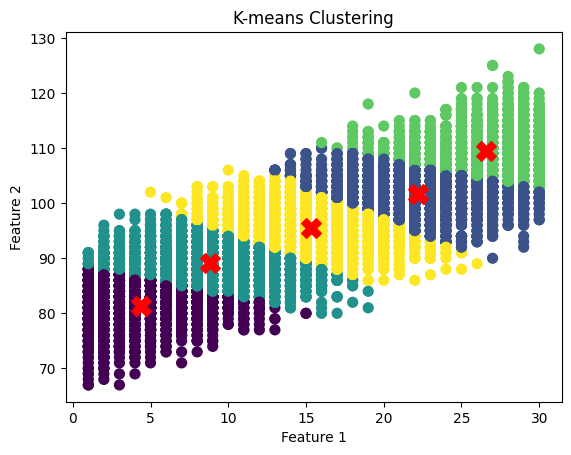

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply KMeans with k=5 (since we generated 5 centers)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x_cluster)

# Plot the clusters
plt.scatter(x_cluster[:, 0], x_cluster[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
centroids

array([[  4.39411521,  81.36054704,  38.81624534],
       [ 22.21817635, 101.62263015,  40.59030996],
       [  8.81681229,  89.1630009 ,  39.58882193],
       [ 26.57835671, 109.48296593,  40.7709018 ],
       [ 15.34753623,  95.55681159,  40.20808696]])

In [ ]:
data_cluster = user_data
data_cluster['Cluster'] = y_kmeans
data_cluster

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Cluster
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,3
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,4
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,2
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,4
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,2
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,4
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,0


## cluster to activities

In [1]:
# checking
#data_cluster[data_cluster['Cluster'] == 1]
#data_cluster[data_cluster['Cluster'] == 2]
data_cluster[data_cluster['Cluster'] == 3]
#data_cluster[data_cluster['Cluster'] == 4]
#data_cluster[data_cluster['Cluster'] == 5]

NameError: name 'data_cluster' is not defined

cluster = 0 --> activities = 1 \\
cluster = 1 --> activities = 4 \\
cluster = 2 --> activities = 2 \\
cluster = 3 --> activities = 5 \\
cluster = 4 --> activities = 3

In [ ]:
data_activities = data_cluster

#change value
score_changes = {
    0: 1,
    1: 4,
    2: 2,
    3: 5,
    4: 3
}
data_activities['Activities'] = data_activities['Cluster'].replace(score_changes)

#drop columns
data_activities = data_activities.drop(columns=['Duration', 'Heart_Rate', 'Body_Temp', 'Cluster'])

data_activities.head()

,User_ID,Gender,Age,Height,Weight,Activities
0,14733363,male,68,190.0,94.0,5
1,14861698,female,20,166.0,60.0,3
2,11179863,male,69,179.0,79.0,2
3,16180408,female,34,179.0,71.0,3
4,17771927,female,27,154.0,58.0,1


# calculate calorie

In [ ]:
def calorie(data):
    #for male
    if data['Gender'] == 'male':
      data['Calorie'] = 66+(13.7*data['Weight'])+(5*data['Height'])-(6.8*data['Age'])
    #for female
    elif data['Gender'] == 'female':
      data['Calorie'] = 655+(9.6*data['Weight'])+(1.8*data['Height'])-(4.7*data['Age'])
    #activities
    ##sgt jarang olahraga
    if data['Activities'] == 1:
      data['Total_cal'] = round(data['Calorie']*1.2,2)
    ##jarang olahraga
    elif data['Activities'] == 2:
      data['Total_cal'] = round(data['Calorie']*1.375,2)
    ##cukup olahraga
    elif data['Activities'] == 3:
      data['Total_cal'] = round(data['Calorie']*1.55,2)
    ##sering olahraga
    elif data['Activities'] == 4:
      data['Total_cal'] = round(data['Calorie']*1.725,2)
    ##sangat sering olahraga
    elif data['Activities'] == 5:
      data['Total_cal'] = round(data['Calorie']*1.9,2)
    return data

In [ ]:
new_data = data_activities.apply(calorie, axis=1)
new_data.head()

,User_ID,Gender,Age,Height,Weight,Activities,Calorie,Total_cal
0,14733363,male,68,190.0,94.0,5,1841.4,3498.66
1,14861698,female,20,166.0,60.0,3,1435.8,2225.49
2,11179863,male,69,179.0,79.0,2,1574.1,2164.39
3,16180408,female,34,179.0,71.0,3,1499.0,2323.45
4,17771927,female,27,154.0,58.0,1,1362.1,1634.52


In [ ]:
#drop data calorie
new_data = new_data.drop(columns=['Calorie'])
new_data.head()

,User_ID,Gender,Age,Height,Weight,Activities,Total_cal
0,14733363,male,68,190.0,94.0,5,3498.66
1,14861698,female,20,166.0,60.0,3,2225.49
2,11179863,male,69,179.0,79.0,2,2164.39
3,16180408,female,34,179.0,71.0,3,2323.45
4,17771927,female,27,154.0,58.0,1,1634.52


In [ ]:
# saving the dataframe
new_data.to_csv('new_data.csv')